In [29]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [30]:
interpreter = tf.lite.Interpreter(model_path=r'E:\jupyter notebook\3.tflite')
interpreter.allocate_tensors()

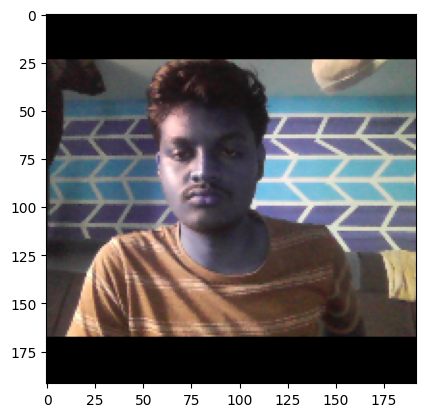

In [31]:
plt.imshow(tf.cast(np.squeeze(img),dtype=tf.int32))

In [32]:
img=frame.copy()

In [33]:
img.shape

(480, 640, 3)

In [34]:
np.expand_dims(img,axis=0).shape

(1, 480, 640, 3)

In [44]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    #reshape image
    img=frame.copy()
    img=tf.image.resize_with_pad(np.expand_dims(img,axis=0),192,192)
    input_image=tf.cast(img,dtype=tf.float32)

    #setup input and output
    input_details=interpreter.get_input_details()
    output_details=interpreter.get_output_details()

    #make predictions
    interpreter.set_tensor(input_details[0]['index'],np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    # print(keypoints_with_scores)

     # Rendering 
    draw_connections(frame, keypoints_with_scores, EDGES, 0.4)
    draw_keypoints(frame, keypoints_with_scores, 0.4)
    
    

    cv2.imshow("Movenet lighting",frame)
    if cv2.waitKey(10) & 0XFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [36]:
keypoints_with_scores.shape

(1, 1, 17, 3)

In [37]:
right_eye = keypoints_with_scores[0][0][2]
left_elbow = keypoints_with_scores[0][0][7]

In [38]:
shaped = np.squeeze(np.multiply(interpreter.get_tensor(interpreter.get_output_details()[0]['index']), [480,640,1]))

In [39]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 4, (0,255,0), -1) 

In [40]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [41]:
shaped[0], shaped[1]

(array([293.89211655, 320.44540405,   0.62909049]),
 array([256.01320267, 356.44996643,   0.41983432]))

In [42]:
for edge, color in EDGES.items():
    p1, p2 = edge
    y1, x1, c1 = shaped[p1]
    y2, x2, c2 = shaped[p2]
    print((int(x2), int(y2)))

(356, 256)
(278, 266)
(392, 258)
(226, 274)
(506, 356)
(142, 377)
(593, 460)
(442, 389)
(92, 452)
(195, 463)
(142, 377)
(542, 482)
(195, 198)
(195, 198)
(576, 406)
(564, 396)
(134, 377)
(9, 209)


In [43]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 2)